## 1. Data Preparation & EDA

In [132]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

import locale

# 设置为英文（适用于 Windows）
locale.setlocale(locale.LC_TIME, 'C')

'C'

In [133]:
#read the data
housing = pd.read_csv('./data/train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [134]:
#checking shape of dataset
housing.shape

(1460, 81)

In [135]:
#checking info of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [136]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [137]:
#checking percentage of null values in each column
df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageQual,5.55
GarageFinish,5.55
GarageType,5.55


In [138]:
#reading data dictionary

f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [139]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
housing['Fence'] = housing['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing[col] = housing[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing[col] = housing[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
housing['Electrical'] = housing['Electrical'].fillna("Other")

In [140]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,142125


In [141]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
Street,0.0
Alley,0.0
LotShape,0.0
LandContour,0.0
Utilities,0.0


We do not have any more null values

## 2. EDA and Data Preparation

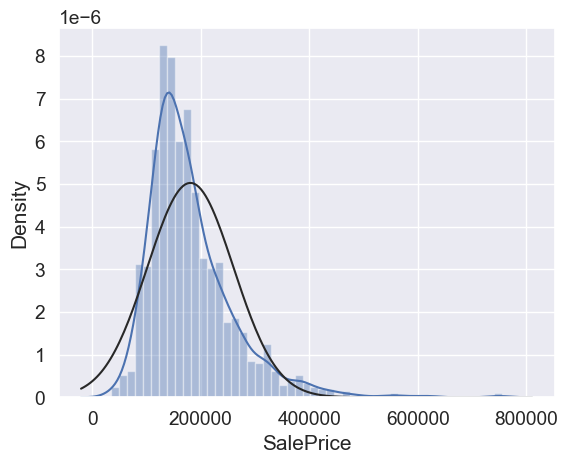

In [142]:
# Let us first visualize the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(housing['SalePrice'], fit=norm)
plt.show()

The Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price

In [143]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, 
#so let's convert that.

housing=housing.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [144]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

"ID" column is like row number, it has all unique values and can be ignored for analysis.

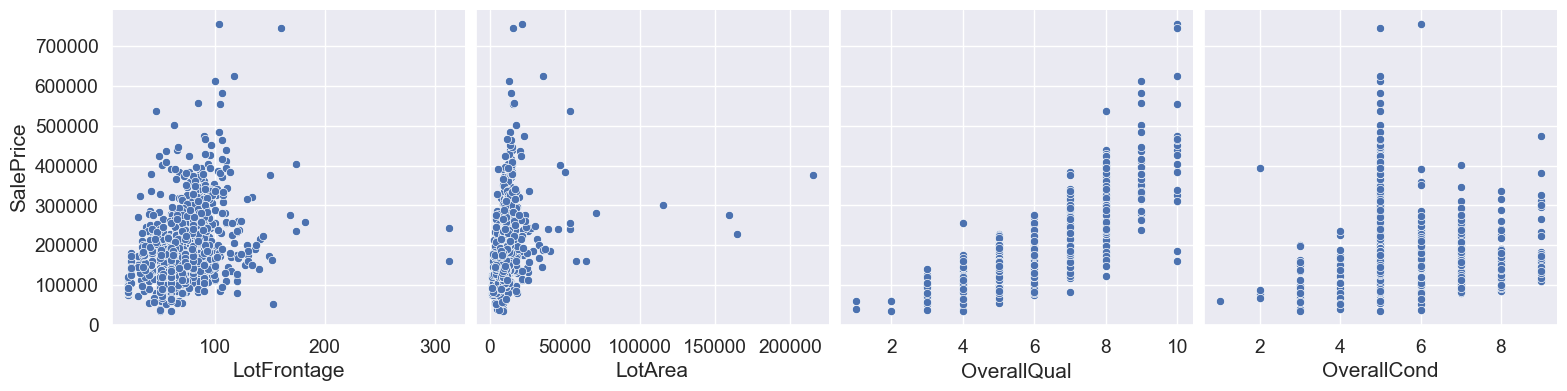

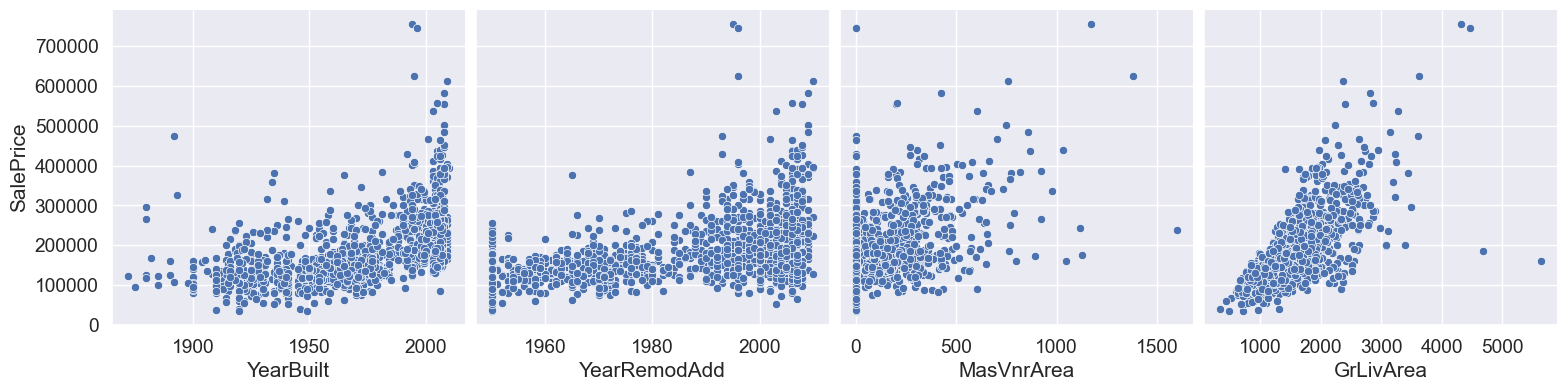

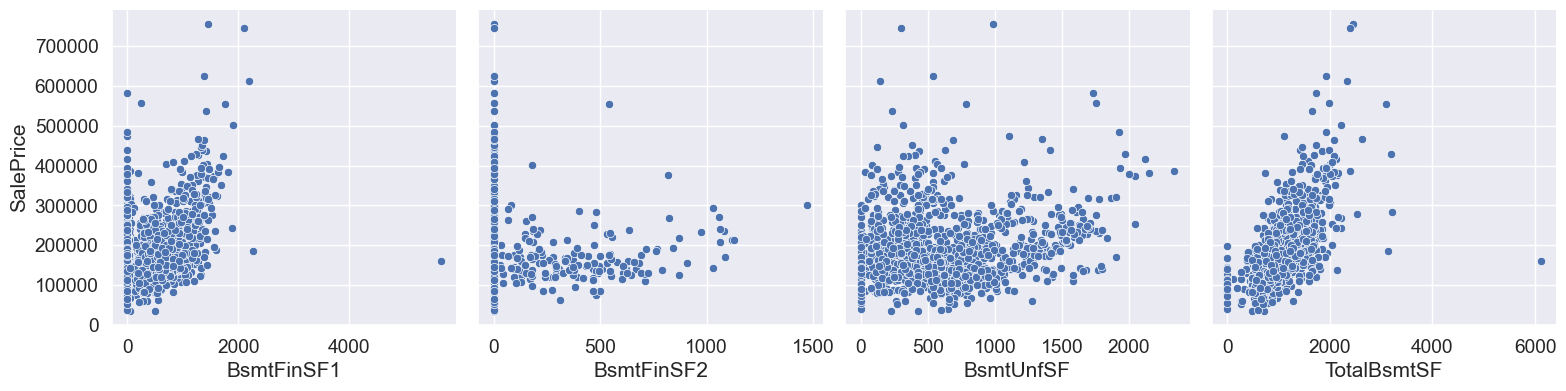

In [145]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('LotFrontage', 'LotArea', 'OverallQual','OverallCond')
pp('YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea')
pp('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

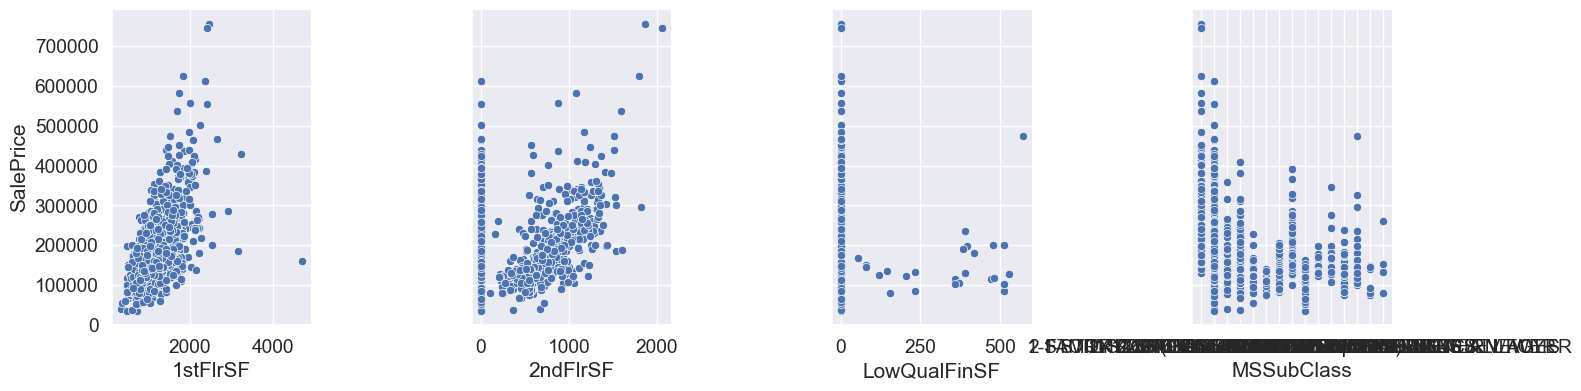

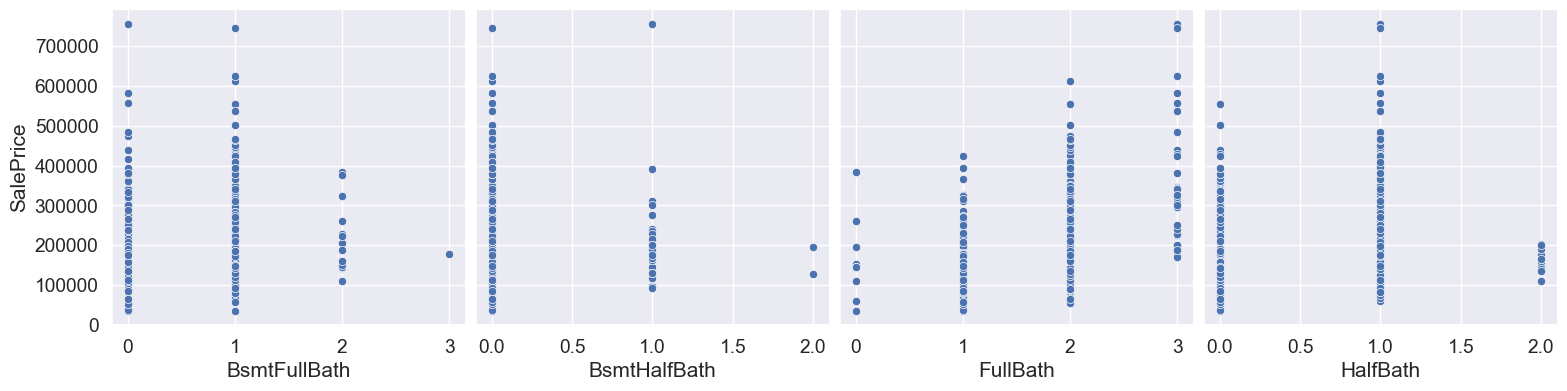

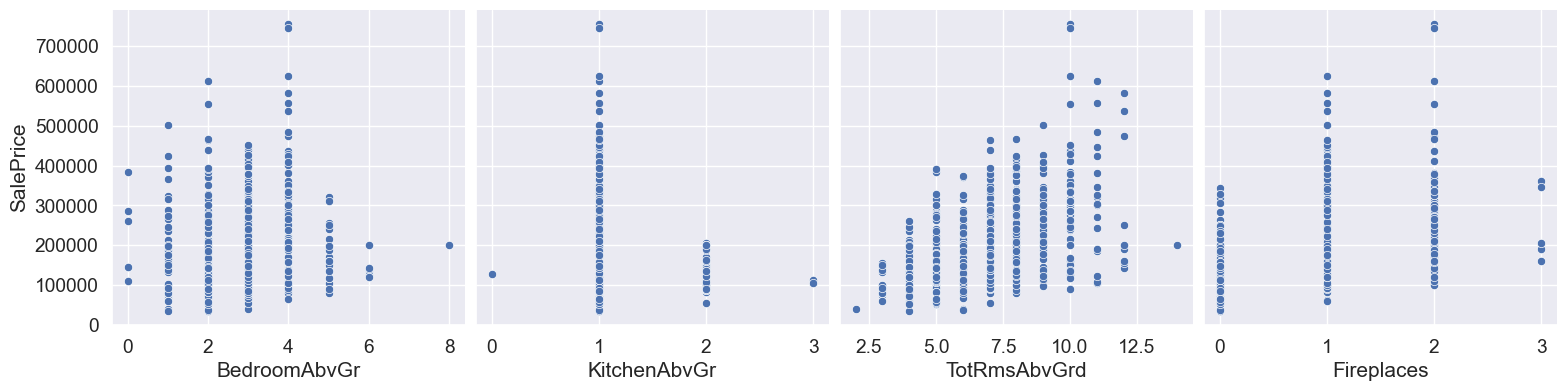

In [146]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('1stFlrSF', '2ndFlrSF','LowQualFinSF','MSSubClass')
pp('BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath')
pp('BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces')

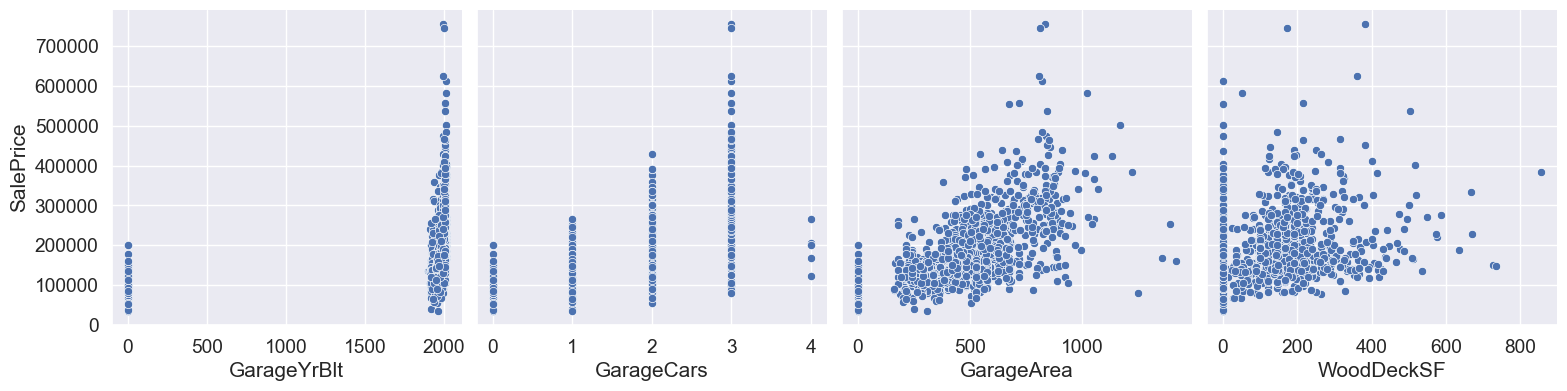

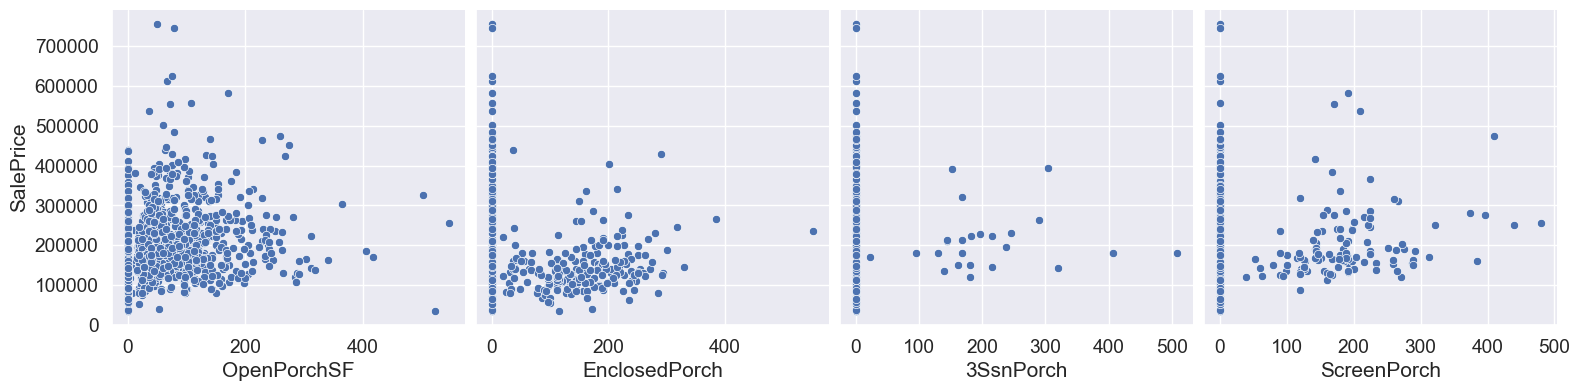

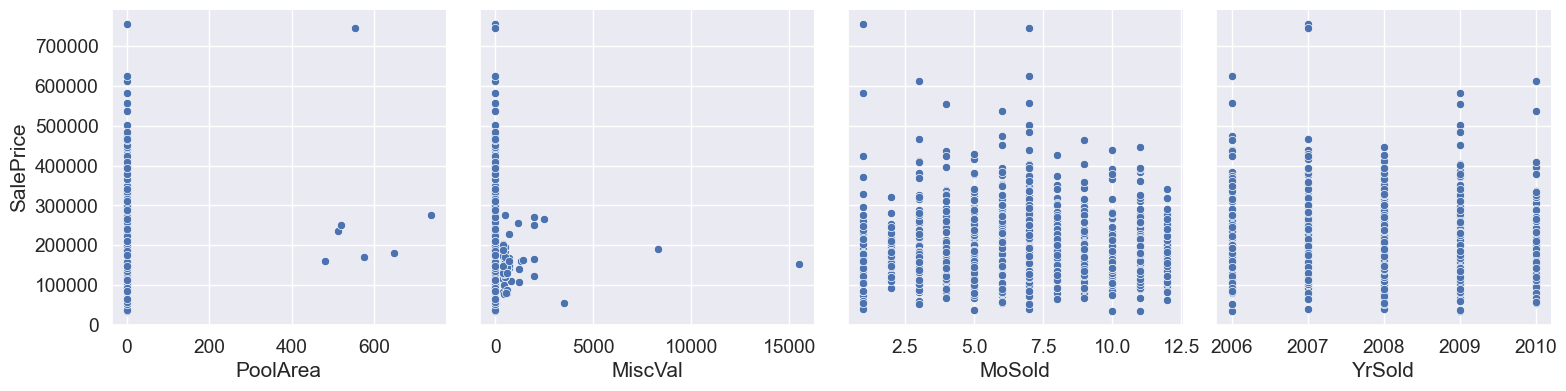

In [147]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF')
pp('OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch')
pp('PoolArea','MiscVal', 'MoSold', 'YrSold')

In [148]:
# label encode ordinal features where there is order in categories

housing = housing.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                     #   "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                    #    "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                    #    "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

housing.BsmtCond = housing.BsmtCond.astype(int)

In [149]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1,var2,label_rotation):
    plt.figure(figsize=(12, 10))   
    plt.subplot(2,2,1)
    plt.title('Count Plot of '+ var1)
    plt1=sns.countplot(housing[var1], palette=("husl"))
    plt1.set(xlabel = '%s'%var1, ylabel='Count of'+ '%s'%var1)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
        
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    plt2=sns.boxplot(x=housing[var1], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,3)
    plt.title('Count Plot of '+ var2)
    plt3=sns.countplot(housing[var2], palette=("husl"))
    plt3.set(xlabel = '%s'%var2, ylabel='Count of'+ '%s'%var2)
    if(label_rotation):
        plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,4)
    plt.title(var2+' vs Price')
    plt4=sns.boxplot(x=housing[var2], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
        
    plt.show()

In [150]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

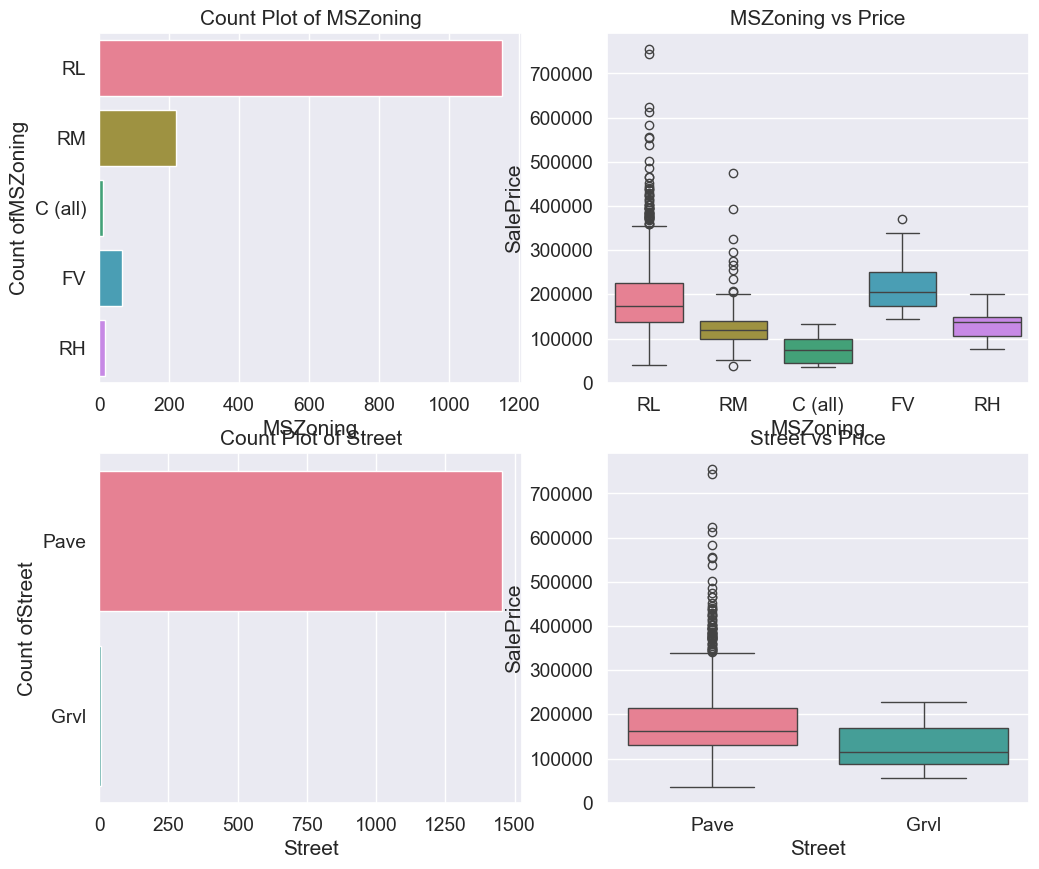

In [151]:
plot_charts('MSZoning', 'Street', label_rotation=False)

**Observation:** 
- MsZoning identifies the general zoning classification of the sale. 
- We see that the prices vary a lot for different values and most of the records are for "RL" Residential Low Density properties.
- Street identifies the Type of road access to property
- While we see that houses with Paved roads have higher Sale Price compared to Gravel, we must also note that this is a highly imbalanced variable with most records as "Pave"

In [152]:
housing['Street'].value_counts(dropna=False)

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

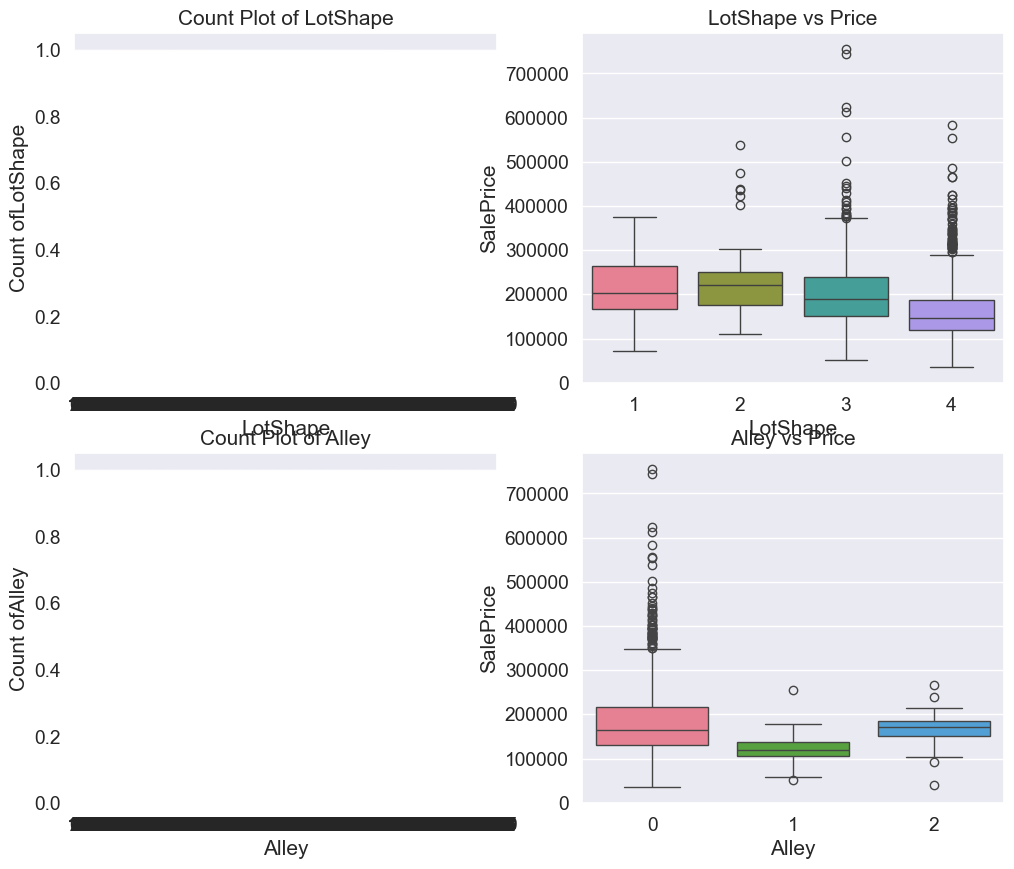

In [153]:
plot_charts('LotShape','Alley',label_rotation=False)

In [154]:
housing['Street'].value_counts(dropna=False)

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

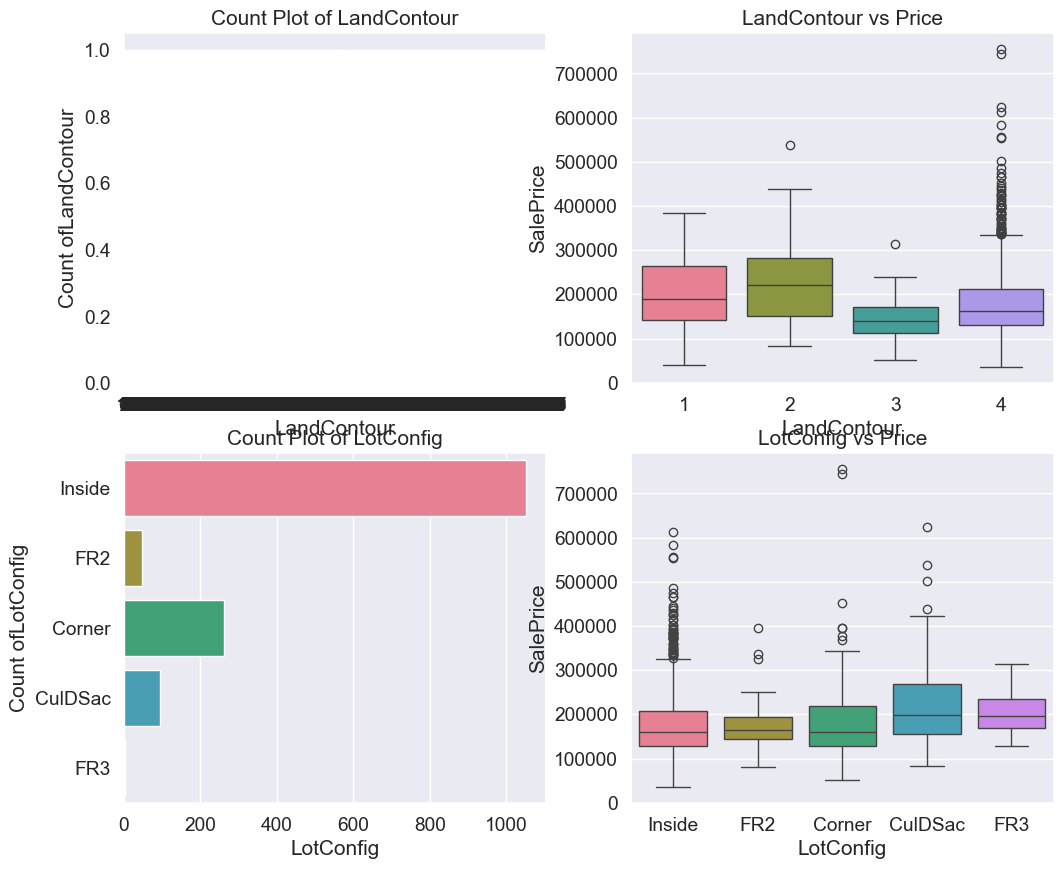

In [155]:
plot_charts('LandContour','LotConfig',label_rotation=False)

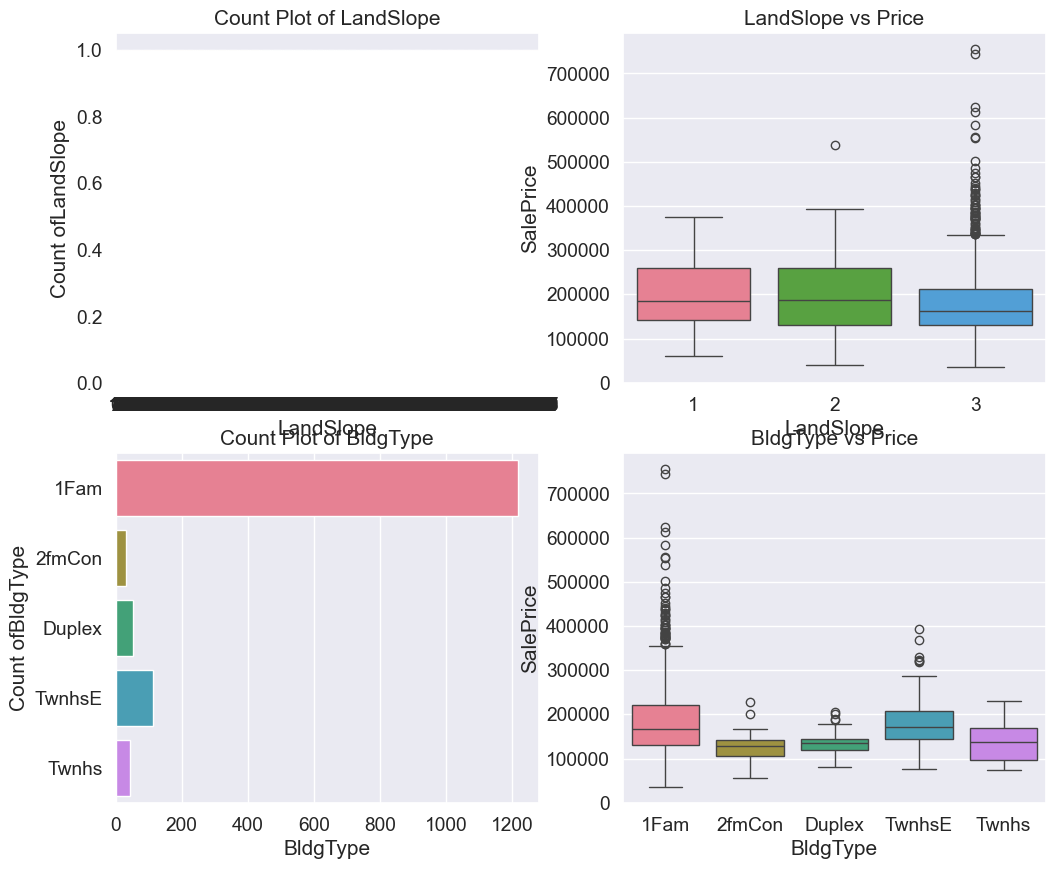

In [156]:
plot_charts('LandSlope','BldgType',label_rotation=False)

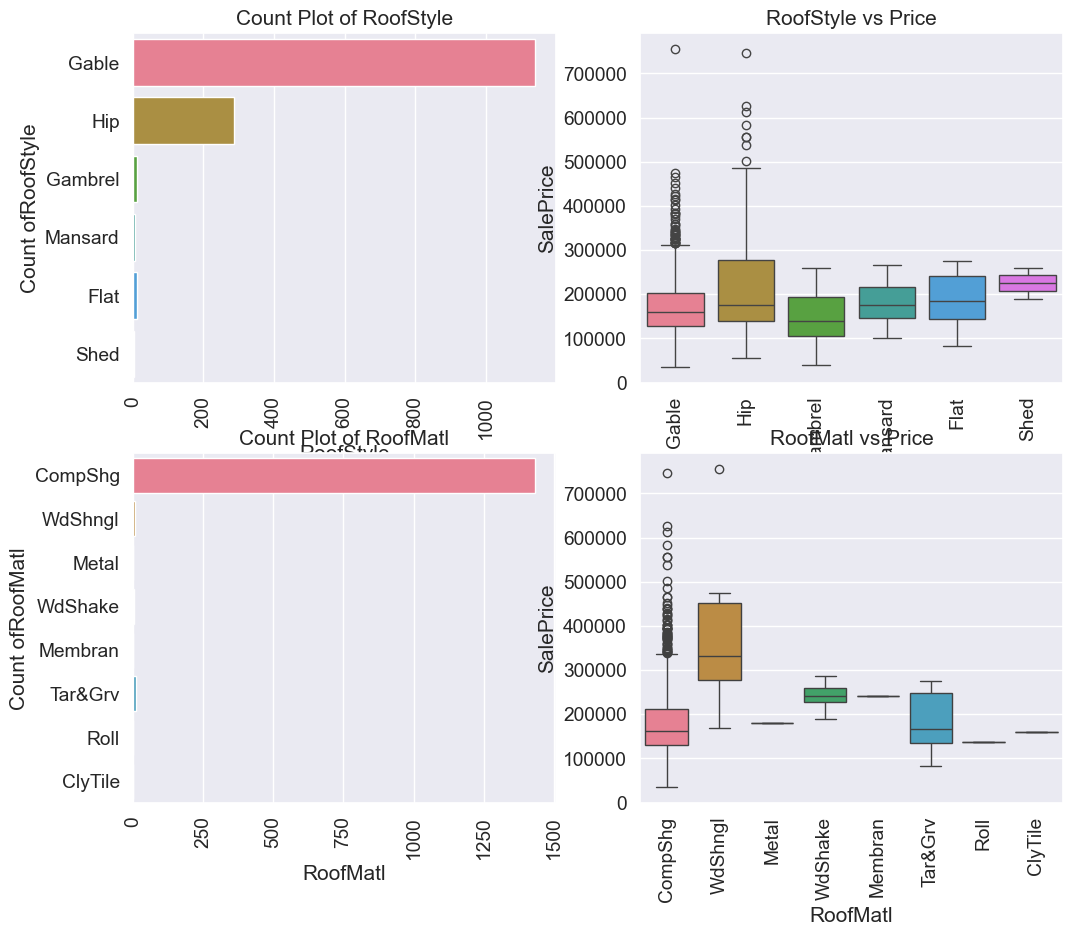

In [157]:
plot_charts('RoofStyle', 'RoofMatl',label_rotation=True)

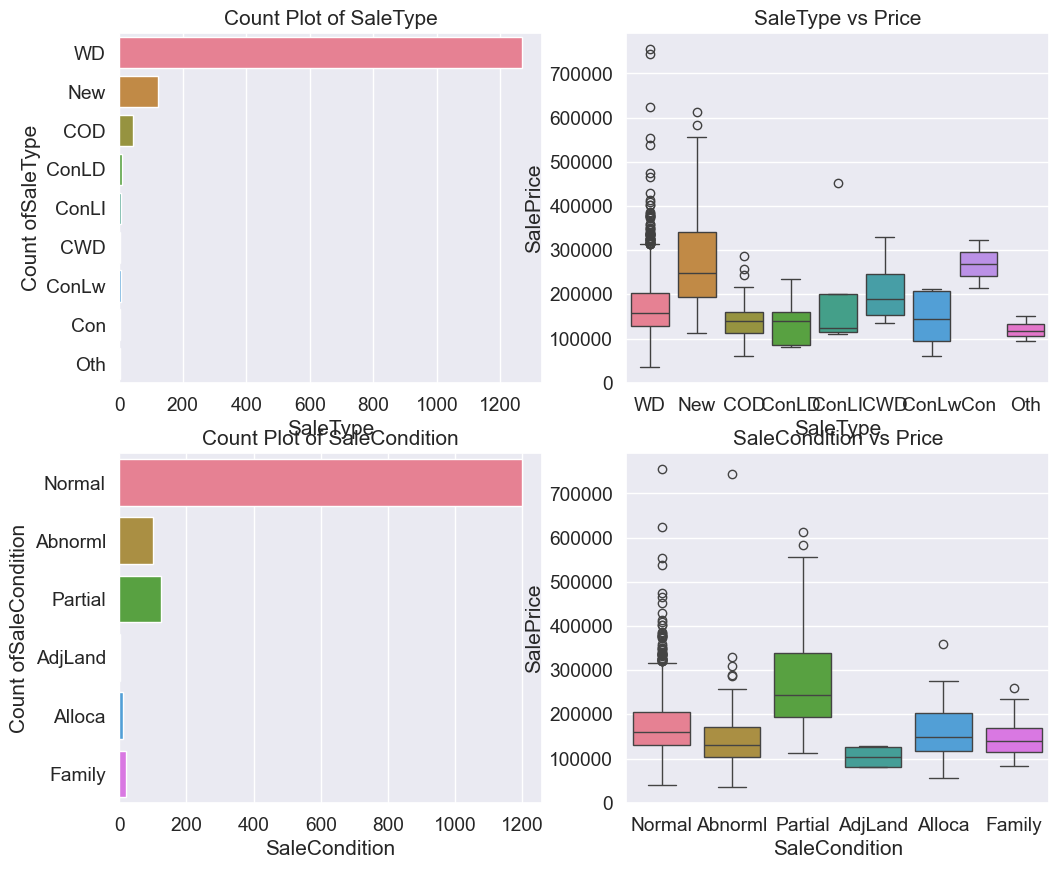

In [158]:
plot_charts('SaleType', 'SaleCondition',label_rotation=False)

In [159]:
# DATA PREPARATION
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,0,4,4,4,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,0,4,4,4,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,0,3,4,4,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,0,3,4,4,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,0,3,4,4,...,0,0,0,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,2-STORY 1946 & NEWER,RL,62.0,7917,Pave,0,4,4,4,...,0,0,0,None,0,8,2007,WD,Normal,175000
1456,1457,1-STORY 1946 & NEWER ALL STYLES,RL,85.0,13175,Pave,0,4,4,4,...,0,0,3,None,0,2,2010,WD,Normal,210000
1457,1458,2-STORY 1945 & OLDER,RL,66.0,9042,Pave,0,4,4,4,...,0,0,4,Shed,2500,5,2010,WD,Normal,266500
1458,1459,1-STORY 1946 & NEWER ALL STYLES,RL,68.0,9717,Pave,0,4,4,4,...,0,0,0,None,0,4,2010,WD,Normal,142125


In [160]:
#changing months to categorical
import calendar

housing['MonthSold'] = housing['MoSold'].apply(lambda x: calendar.month_name[x])
housing=housing.drop(['MoSold'], axis=1)

In [161]:
#changing data type of Gararge yr built to int from float
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [162]:
#DERIVED VARIABLES which might make more sense than year

housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['Remod_Age'] = housing['YrSold'] - housing['YearRemodAdd']
housing['Garage_Age'] = housing['YrSold'] - housing['GarageYrBlt']
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis= 1, inplace = True)

In [163]:
numeric_data = housing.select_dtypes(include = ['int64','float64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'SalePrice', 'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

In [164]:
#OUTLIER TREATMENT
def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [165]:
numeric_data_list=list(numeric_data.columns)

In [166]:
housing=remove_outliers(housing,numeric_data_list)

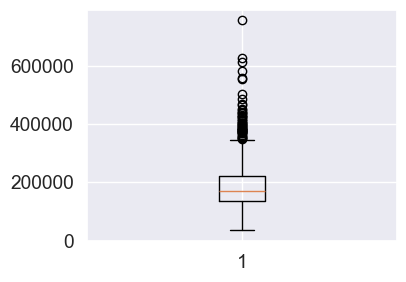

In [167]:
# Outlier treatment on the variable Sale Price
plt.figure(figsize=(4,3))
plt.boxplot(housing['SalePrice'])
plt.show()

In [168]:
housing.shape

(1158, 80)

In [169]:
cor = numeric_data.corr()
plt.figure(figsize=(20,20))
#plot heatmap
plt.show()

<Figure size 2000x2000 with 0 Axes>

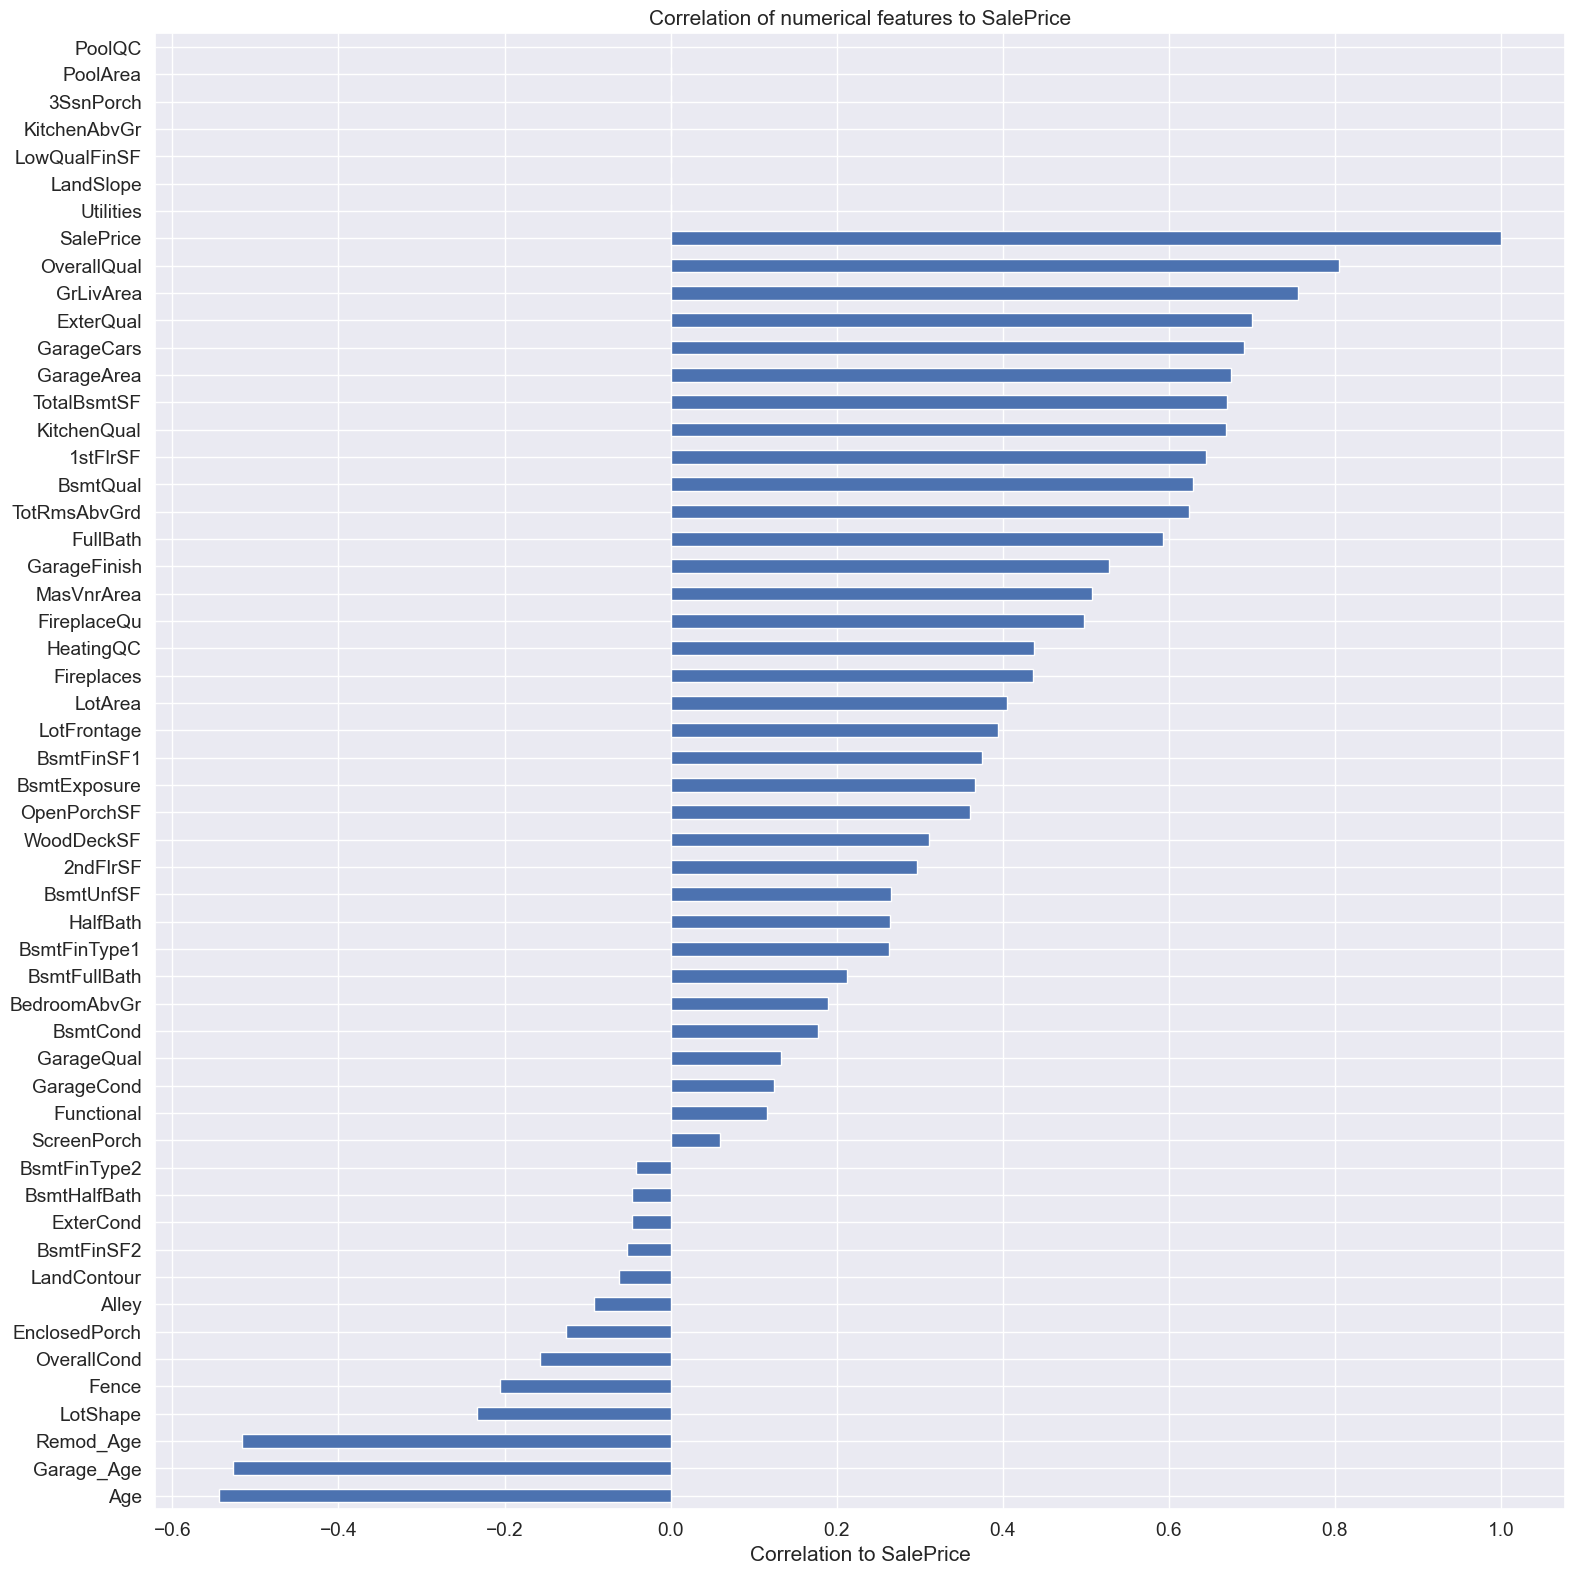

In [170]:
# we drop Id (not relevant)
corr = housing.drop(["Id"], axis=1).select_dtypes(include="number").corr()

plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

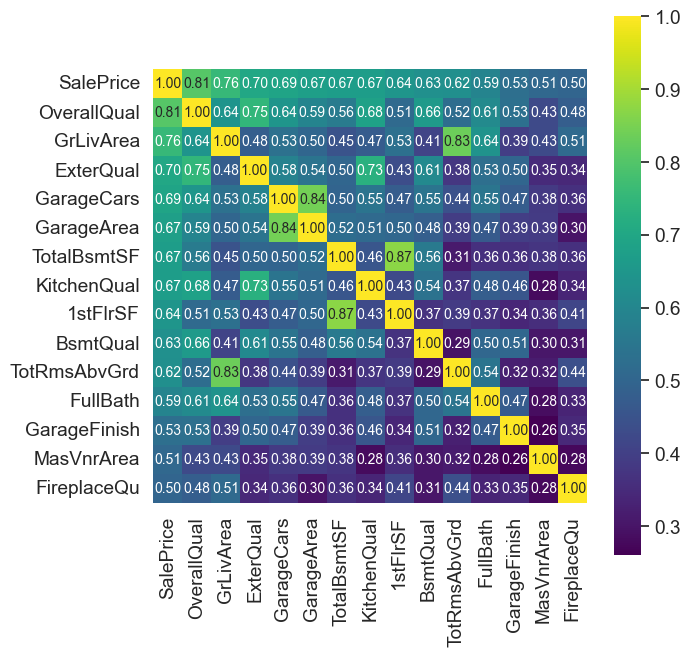

In [171]:
#saleprice correlation matrix
plt.figure(figsize=(7,7))
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [172]:
#converting binary variables to numeric by mapping to 0 and 1

housing['Street'] = housing['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing['CentralAir'] = housing['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,MonthSold,Age,Remod_Age,Garage_Age
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,1,0,4,4,4,...,0,None,0,WD,Normal,208500,February,5,5,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,1,0,4,4,4,...,0,None,0,WD,Normal,181500,May,31,31,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,1,0,3,4,4,...,0,None,0,WD,Normal,223500,September,7,6,7
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,1,0,3,4,4,...,0,None,0,WD,Abnorml,140000,February,91,36,8
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,1,0,3,4,4,...,0,None,0,WD,Normal,250000,December,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,1-STORY 1946 & NEWER ALL STYLES,FV,62.0,7500,1,2,4,4,4,...,0,None,0,WD,Normal,185000,October,5,4,5
1455,1456,2-STORY 1946 & NEWER,RL,62.0,7917,1,0,4,4,4,...,0,None,0,WD,Normal,175000,August,8,7,8
1456,1457,1-STORY 1946 & NEWER ALL STYLES,RL,85.0,13175,1,0,4,4,4,...,3,None,0,WD,Normal,210000,February,32,22,32
1458,1459,1-STORY 1946 & NEWER ALL STYLES,RL,68.0,9717,1,0,4,4,4,...,0,None,0,WD,Normal,142125,April,60,14,60


In [173]:
#converting binary variables to numeric by mapping to 0 and 1

housing['PavedDrive'] = housing['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [174]:
#Create a categorical data frame
df = housing.drop(['Id'],axis=1)
housing_categorical = df.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,February
1,1-STORY 1946 & NEWER ALL STYLES,RL,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal,May
2,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,September
3,2-STORY 1945 & OLDER,RL,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml,February
4,2-STORY 1946 & NEWER,RL,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,December


In [175]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False


In [176]:
#dropping original categorical columns
df = df.drop(list(housing_categorical.columns), axis=1)

In [177]:
#concatenating dummy columns to original dataframe
df = pd.concat([df,housing_dummies], axis=1)

In [178]:
df.shape

(1158, 208)

In [179]:
#train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)

In [180]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",axis=1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",axis=1)

In [181]:
num_vars=X_train.select_dtypes(include=['int64','float64']).columns

In [182]:
num_vars

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'Age',
       'Remod_Age', 'Garage_Age'],
      dtype='object')

In [183]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [184]:
#linear regression model

In [185]:
lm=LinearRegression()
lm.fit(X_train,y_train)

#recursive feature elimination! -- Important to discuss
rfe = RFE(lm,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_NridgHt', 'Condition2_Norm',
       'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Twnhs',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd', 'Heating_Grav', 'Electrical_FuseF',
       'SaleType_Con'],
      dtype='object')

In [186]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,MonthSold,Age,Remod_Age,Garage_Age
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,1,0,4,4,4,...,0,None,0,WD,Normal,208500,February,5,5,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,1,0,4,4,4,...,0,None,0,WD,Normal,181500,May,31,31,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,1,0,3,4,4,...,0,None,0,WD,Normal,223500,September,7,6,7
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,1,0,3,4,4,...,0,None,0,WD,Abnorml,140000,February,91,36,8
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,1,0,3,4,4,...,0,None,0,WD,Normal,250000,December,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,1-STORY 1946 & NEWER ALL STYLES,FV,62.0,7500,1,2,4,4,4,...,0,None,0,WD,Normal,185000,October,5,4,5
1455,1456,2-STORY 1946 & NEWER,RL,62.0,7917,1,0,4,4,4,...,0,None,0,WD,Normal,175000,August,8,7,8
1456,1457,1-STORY 1946 & NEWER ALL STYLES,RL,85.0,13175,1,0,4,4,4,...,3,None,0,WD,Normal,210000,February,32,22,32
1458,1459,1-STORY 1946 & NEWER ALL STYLES,RL,68.0,9717,1,0,4,4,4,...,0,None,0,WD,Normal,142125,April,60,14,60


In [187]:
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

X_train_new = X_train_new.applymap(np.int64)
X_train_new

,const,OverallQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_NridgHt,Condition2_Norm,Condition2_PosN,Condition2_RRNn,...,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_Tar&Grv,Exterior1st_CemntBd,Exterior2nd_CmentBd,Heating_Grav,Electrical_FuseF,SaleType_Con
1189,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
755,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
423,1,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
777,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
627,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1381,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1425,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1093,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [188]:
#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     65.92
Date:                Fri, 14 Mar 2025   Prob (F-statistic):          5.10e-153
Time:                        18:07:12   Log-Likelihood:                 42.929
No. Observations:                 810   AIC:                            -43.86
Df Residuals:                     789   BIC:                             54.78
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5000      0.319     36.102      0.000      10.875      12.125
OverallQual              0.3782      0.016     23.228      0.000       0.346       0.410
MSZoning_FV              0.9389      0.177      5.313      0.000       0.592       1.286
MSZoning_RH              0.5359      0.196      2.737      0.006       0.152       0.920
MSZoning_RL              0.8124      0.172      4.732      0.000       0.475       1.149
MSZoning_RM              0.5833      0.172      3.384      0.001       0.245       0.922
Neighborhood_NridgHt     0.1683      0.036      4.618      0.000       0.097       0.240
Condition2_Norm          0.0549      0.135      0.406      0.685      -0.210       0.320
Condition2_PosN         -0.3748      0.218     -1.719      0.086      -0.803       0.053
Condition2_RRNn         -0.0165      0.269     -0.061      0.951      -0.545       0.512
BldgType_Twnhs          -0.1709      0.054     -3.169      0.002      -0.277      -0.065
RoofStyle_Gable         -0.3308      0.233     -1.421      0.156      -0.788       0.126
RoofStyle_Gambrel       -0.2931      0.250     -1.173      0.241      -0.784       0.197
RoofStyle_Hip           -0.3424      0.233     -1.467      0.143      -0.801       0.116
RoofStyle_Mansard       -0.0871      0.260     -0.335      0.738      -0.598       0.423
RoofMatl_Tar&Grv        -0.3416      0.329     -1.039      0.299      -0.987       0.304
Exterior1st_CemntBd     -0.0045      0.238     -0.019      0.985      -0.472       0.463
Exterior2nd_CmentBd      0.0627      0.235      0.267      0.789      -0.398       0.524
Heating_Grav            -0.3686      0.233     -1.580      0.115      -0.827       0.089
Electrical_FuseF        -0.1580      0.089     -1.779      0.076      -0.332       0.016
SaleType_Con             0.2738      0.233      1.174      0.241      -0.184       0.732
==============================================================================
Omnibus:                        6.583   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                8.863
Skew:                           0.027   Prob(JB):                       0.0119
Kurtosis:                       3.510   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ridge regularisation

Ridge regularisation is a simple method to make sure you don't overfit your data. 
- A form of L2 regularisation
- One term is focused on fitting the data well, and the second term is focused on minimizing the loss
- Ridge regression penalises the square of the sum of the weights
- As such we expect absolute values of weights and ability to penalise extreme values

In [189]:
#RIDGE REGULARIZATION

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [190]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.08068068409991123


In [191]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010873,0.001634,0.004043,0.001411,0.0001,{'alpha': 0.0001},-0.089905,-0.084008,-0.093584,-0.091592,...,-0.087148,0.006145,26,-0.058591,-0.057859,-0.052122,-0.054044,-0.059352,-0.056394,0.002811
1,0.009419,0.000439,0.002978,0.000276,0.0010,{'alpha': 0.001},-0.089867,-0.084014,-0.093585,-0.091516,...,-0.087120,0.006142,25,-0.058600,-0.057858,-0.052131,-0.054054,-0.059361,-0.056401,0.002809
2,0.008645,0.000244,0.003891,0.000530,0.0100,{'alpha': 0.01},-0.089496,-0.084033,-0.093455,-0.090818,...,-0.086900,0.005955,24,-0.058679,-0.057868,-0.052219,-0.054155,-0.059444,-0.056473,0.002797
3,0.008552,0.000168,0.003139,0.000861,0.0500,{'alpha': 0.05},-0.088187,-0.084011,-0.092414,-0.088773,...,-0.086139,0.005157,23,-0.058953,-0.058003,-0.052692,-0.054583,-0.059741,-0.056794,0.002703
4,0.009876,0.000697,0.002491,0.000116,0.1000,{'alpha': 0.1},-0.087483,-0.083609,-0.091525,-0.087399,...,-0.085605,0.004549,22,-0.059230,-0.058222,-0.053325,-0.055107,-0.060097,-0.057196,0.002567
5,0.009030,0.000154,0.002836,0.000300,0.2000,{'alpha': 0.2},-0.086597,-0.082638,-0.090458,-0.086045,...,-0.084968,0.003842,21,-0.059834,-0.058636,-0.054437,-0.055815,-0.060720,-0.057888,0.002391
6,0.008953,0.000249,0.002645,0.000320,0.3000,{'alpha': 0.3},-0.086169,-0.081785,-0.089895,-0.085379,...,-0.084625,0.003497,20,-0.060333,-0.059062,-0.055511,-0.056312,-0.061297,-0.058503,0.002246
7,0.010394,0.000652,0.002461,0.000087,0.4000,{'alpha': 0.4},-0.086083,-0.081217,-0.089637,-0.085412,...,-0.084556,0.003378,19,-0.060728,-0.059424,-0.056409,-0.056668,-0.061801,-0.059006,0.002152
8,0.009328,0.000533,0.002532,0.000100,0.5000,{'alpha': 0.5},-0.086122,-0.080776,-0.089432,-0.085321,...,-0.084488,0.003325,18,-0.061049,-0.059756,-0.057183,-0.056936,-0.062206,-0.059426,0.002083
9,0.008420,0.000348,0.003000,0.000689,0.6000,{'alpha': 0.6},-0.086109,-0.080372,-0.089228,-0.085175,...,-0.084384,0.003297,17,-0.061308,-0.060053,-0.057850,-0.057172,-0.062558,-0.059788,0.002032


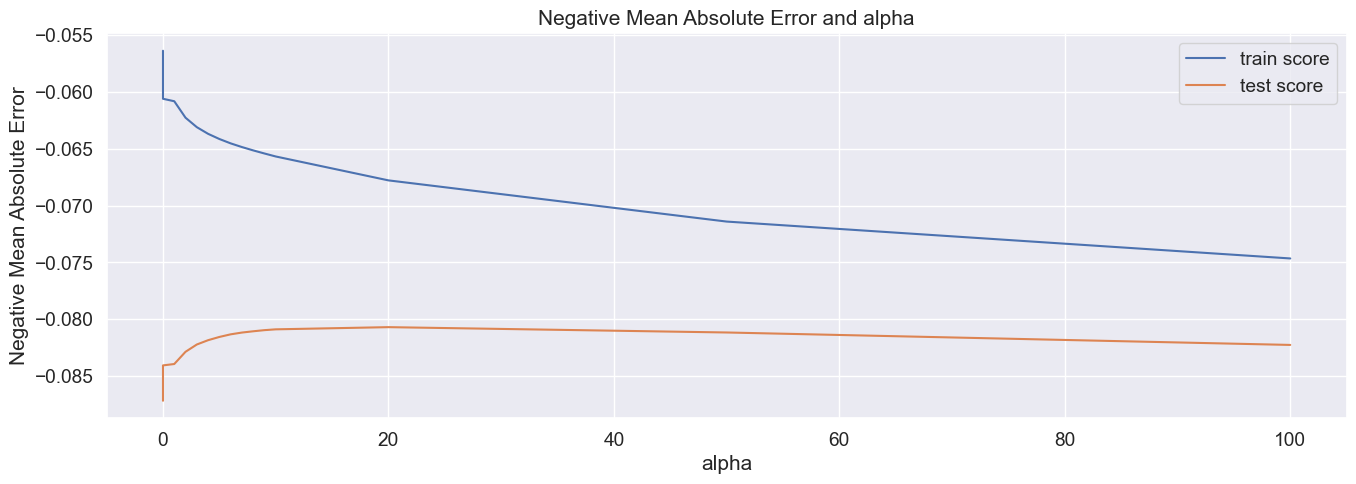

In [192]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [193]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 9.99187587e-03,  8.97595795e-03,  0.00000000e+00,  3.17582264e-03,
        8.18666170e-05,  1.55086998e-03,  0.00000000e+00,  0.00000000e+00,
        7.08833041e-02,  3.67007262e-02,  2.07359202e-03,  8.93835477e-03,
       -5.65450683e-03,  1.03423388e-02, -1.76929766e-03,  1.13626642e-02,
        7.50366153e-03,  2.00243184e-02, -3.20251294e-03,  7.40276312e-03,
        6.73886139e-05,  2.42442540e-02,  1.18754748e-02,  1.42419739e-02,
        2.87786171e-02,  3.78368333e-02,  0.00000000e+00,  5.46175430e-02,
        1.42661085e-02,  5.83021553e-03,  1.37242402e-02,  1.13656363e-02,
        1.48712181e-03,  0.00000000e+00,  1.61781910e-02,  2.35551067e-02,
        7.90802457e-03,  2.01969913e-02, -2.41326794e-04,  5.67260784e-03,
        1.59877949e-02,  2.95064866e-02, -1.14495953e-04,  1.30809703e-02,
       -1.48197760e-03,  1.51550464e-02,  6.44264063e-03,  3.48462771e-03,
        0.00000000e+00,  1.71309034e-02,  0.00000000e+00,  0.00000000e+00,
       -4.90477807e-03,  

In [194]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9261160600780203


In [195]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9288349182208386


In [196]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.01035648254881569


In [197]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', np.float64(11.899)),
 ('LotFrontage', np.float64(0.01)),
 ('LotArea', np.float64(0.009)),
 ('Street', np.float64(0.0)),
 ('Alley', np.float64(0.003)),
 ('LotShape', np.float64(0.0)),
 ('LandContour', np.float64(0.002)),
 ('Utilities', np.float64(0.0)),
 ('LandSlope', np.float64(0.0)),
 ('OverallQual', np.float64(0.071)),
 ('OverallCond', np.float64(0.037)),
 ('MasVnrArea', np.float64(0.002)),
 ('ExterQual', np.float64(0.009)),
 ('ExterCond', np.float64(-0.006)),
 ('BsmtQual', np.float64(0.01)),
 ('BsmtCond', np.float64(-0.002)),
 ('BsmtExposure', np.float64(0.011)),
 ('BsmtFinType1', np.float64(0.008)),
 ('BsmtFinSF1', np.float64(0.02)),
 ('BsmtFinType2', np.float64(-0.003)),
 ('BsmtFinSF2', np.float64(0.007)),
 ('BsmtUnfSF', np.float64(0.0)),
 ('TotalBsmtSF', np.float64(0.024)),
 ('HeatingQC', np.float64(0.012)),
 ('CentralAir', np.float64(0.014)),
 ('1stFlrSF', np.float64(0.029)),
 ('2ndFlrSF', np.float64(0.038)),
 ('LowQualFinSF', np.float64(0.0)),
 ('GrLivArea', np.fl


# Lasso Regularisation

Answer some of the questions below yourself, before proceeding with the code. 

- What is Lasso Regularisation?
- What type of regularisation is this?
- How does it differ from ridge regression? 
- Which one would you use and when?

In [198]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [199]:
# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [200]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.07978677409452824


In [201]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [202]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9210687693254106


In [203]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9289532843338542


In [204]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.01033925701414098


In [205]:
# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', np.float64(11.968)),
 ('LotFrontage', np.float64(0.012)),
 ('LotArea', np.float64(0.012)),
 ('Street', np.float64(0.0)),
 ('Alley', np.float64(0.004)),
 ('LotShape', np.float64(-0.0)),
 ('LandContour', np.float64(0.001)),
 ('Utilities', np.float64(0.0)),
 ('LandSlope', np.float64(0.0)),
 ('OverallQual', np.float64(0.081)),
 ('OverallCond', np.float64(0.037)),
 ('MasVnrArea', np.float64(0.002)),
 ('ExterQual', np.float64(0.01)),
 ('ExterCond', np.float64(-0.006)),
 ('BsmtQual', np.float64(0.007)),
 ('BsmtCond', np.float64(-0.0)),
 ('BsmtExposure', np.float64(0.01)),
 ('BsmtFinType1', np.float64(0.004)),
 ('BsmtFinSF1', np.float64(0.022)),
 ('BsmtFinType2', np.float64(-0.0)),
 ('BsmtFinSF2', np.float64(0.005)),
 ('BsmtUnfSF', np.float64(-0.0)),
 ('TotalBsmtSF', np.float64(0.029)),
 ('HeatingQC', np.float64(0.013)),
 ('CentralAir', np.float64(0.01)),
 ('1stFlrSF', np.float64(0.002)),
 ('2ndFlrSF', np.float64(0.0)),
 ('LowQualFinSF', np.float64(0.0)),
 ('GrLivArea', np.float6

In [206]:
test_data=pd.read_csv('./data/test.csv')

In [207]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [208]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.79
MiscFeature,96.50
Alley,92.67
Fence,80.12
MasVnrType,61.27
FireplaceQu,50.03
LotFrontage,15.56
GarageYrBlt,5.35
GarageCond,5.35
GarageFinish,5.35


In [209]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
test_data['PoolQC'] = test_data['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
test_data['Alley'] = test_data['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
test_data['Fence'] = test_data['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_data[col] = test_data[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    test_data[col] = test_data[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
test_data['Electrical'] = test_data['Electrical'].fillna("Other")

In [210]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
MSZoning,0.27
Utilities,0.14
BsmtHalfBath,0.14
BsmtFullBath,0.14
Functional,0.14
GarageCars,0.07
BsmtUnfSF,0.07
BsmtFinSF2,0.07
Exterior2nd,0.07
BsmtFinSF1,0.07


In [211]:
catgl_feats = test_data.dtypes[test_data.dtypes == 'object'].index
numrl_feats = test_data.dtypes[test_data.dtypes != 'object'].index

In [212]:
Nan_cols = []

cols = test_data.columns
for i in cols:
    if (test_data[i].isnull().sum()/len(df))*100 > 0:
        Nan_cols.append(i)

In [213]:
cat_treat_list = []
num_treat_list = []

for i in Nan_cols:
    if i in catgl_feats:
        cat_treat_list.append(i)
    else:
        num_treat_list.append(i)

In [214]:
cat_treat_list

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

In [215]:
num_treat_list

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [216]:
for i in cat_treat_list:
    test_data[i].fillna(test_data[i].mode()[0], inplace = True)

In [217]:
for i in num_treat_list:
    test_data[i].fillna(0, inplace = True)

In [218]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
Street,0.0
Alley,0.0
LotShape,0.0
LandContour,0.0
Utilities,0.0


In [219]:
# label encode ordinal features where there is order in categories

test_data = test_data.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                     #   "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                    #    "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                     #   "Street":       {"None" : 0, "Grvl" : 0 , "Pave" : 1},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

test_data.BsmtCond = test_data.BsmtCond.astype(int)

In [220]:
test_data.GarageQual = test_data.GarageQual.astype(int)

In [221]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

test_data=test_data.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [222]:
#changing months to categorical
import calendar

test_data['MonthSold'] = test_data['MoSold'].apply(lambda x: calendar.month_name[x])
test_data=test_data.drop(['MoSold'], axis=1)

In [223]:
#changing data type of Gararge yr built to int from float
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype(int)

In [224]:
#DERIVED VARIABLES which might make more sense than year

test_data['Age'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['Remod_Age'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data['Garage_Age'] = test_data['YrSold'] - test_data['GarageYrBlt']
test_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace = True)

In [225]:
#converting binary variables to numeric by mapping to 0 and 1

test_data['Street'] = test_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
test_data['CentralAir'] = test_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [226]:
#converting binary variables to numeric by mapping to 0 and 1

test_data['PavedDrive'] = test_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)


In [227]:
test_data_X=test_data.drop('Id', axis=1)

In [228]:
test_data_numerical=test_data_X.select_dtypes(include=['int32','int64','float64']).columns

In [229]:
test_data_numerical

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'Age',
       'Remod_Age', 'Garage_Age'],
      dtype='object')

In [230]:
test_data_categorical = test_data_X.select_dtypes(include=['object'])
test_data_categorical.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,1-STORY 1946 & NEWER ALL STYLES,RH,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,VinylSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal,June
1,1-STORY 1946 & NEWER ALL STYLES,RL,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Attchd,Gar2,WD,Normal,June
2,2-STORY 1946 & NEWER,RL,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,None,PConc,GasA,SBrkr,Attchd,None,WD,Normal,March
3,2-STORY 1946 & NEWER,RL,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,June
4,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,...,HdBoard,None,PConc,GasA,SBrkr,Attchd,None,WD,Normal,January


In [231]:
X_train_categorical = X_train.select_dtypes(exclude=[np.number])
X_train_categorical.shape

(810, 150)

In [232]:
# convert into dummies
test_data_dummies = pd.get_dummies(test_data_categorical, drop_first=True).applymap(np.int64)
test_data_dummies = test_data_dummies.reindex(columns=X_train_categorical.columns, fill_value=0)
test_data_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [233]:
#dropping original categorical columns
df_test = test_data_X.drop(list(test_data_categorical.columns), axis=1)

In [234]:
#concatenating dummy columns to original dataframe
df = pd.concat([df_test,test_data_dummies], axis=1)

In [235]:
df[test_data_numerical].shape

(1459, 57)

In [236]:
df[test_data_numerical] = scaler.transform(df[test_data_numerical])
df_col = pd.DataFrame(np.column_stack((df.columns, X_train.columns)), columns=['df','X_train'])
set(df_col['df']) == set(df_col['X_train'])

True

In [237]:
#lets predict the R-squared value of test and train data
y_test_predicted = lasso.predict(df)

In [238]:
y_test_predicted

array([11.71012483, 11.97802807, 12.04697122, ..., 12.12366334,
       11.44487323, 12.33985486], shape=(1459,))

In [239]:
final_predictions = np.exp(y_test_predicted)

In [240]:
final_predictions

array([121798.68450461, 159217.75519799, 170581.96911722, ...,
       184178.99160858,  93421.16755036, 228628.76658611], shape=(1459,))

In [241]:
salespriceprediction= pd.DataFrame({'Id': test_data['Id'] ,'SalePrice': final_predictions })

In [242]:
salespriceprediction.to_csv("salespriceprediction.csv",index=False)